# Base de dados 

Esta base de dados pode ser encontrada em uma competição do kaggle atráves do link: 

https://www.kaggle.com/competitions/rossmann-store-sales/overview


# Pacotes

In [58]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Pacotes dos modelo
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Leitura de dados

In [48]:
# base de dados crua
sales = pd.read_csv('dados/train.csv', low_memory=False)
store = pd.read_csv('dados/store.csv', low_memory=False)
sales_test = pd.read_csv('dados/test.csv', low_memory=False)


# join
df = pd.merge(sales, store, how = 'left', on = 'Store')
df_test = pd.merge(sales_test, store, how = 'left', on = 'Store').drop('Id', axis=1)

In [46]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


# 1. Análise descritiva 

### 1.1 Dimensão do dados

In [4]:
print('Número de linhas: ', df.shape[0])
print('Número de colunas: ', df.shape[1])

Número de linhas:  1017209
Número de colunas:  18


### 1.2 Valores faltantes

In [67]:
df.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [20]:
df1 = df.dropna()

In [21]:
df1.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Intercepto                   0
dtype: int64

### 1.3 Linhas Duplicadas

In [6]:
df.duplicated().sum()

0

### 1.4 Tipos de Váriaveis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

### 1.5 Limpeza dos dados

In [51]:
# dados faltantes 
df1 = df.copy()
df1 = df1.dropna()

In [52]:
# transformando as variaveis categoricas em dummy e 'Date' em date
df1['Date'] = pd.to_datetime(df1['Date'], format = '%Y-%m-%d')
df1 = pd.get_dummies(df1, drop_first = True)

df_test['Date'] = pd.to_datetime(df_test['Date'], format = '%Y-%m-%d')
df_test = pd.get_dummies(df_test, drop_first = True)

C:\Users\Ben-Hur\AppData\Local\Temp\ipykernel_14004\137483409.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Date'] = pd.to_datetime(df_test['Date'], format = '%Y-%m-%d')


# 2 Análise exploratória 

In [8]:
#%%time
#sns.pairplot(df, kind='reg');

### 2.1 Correlação

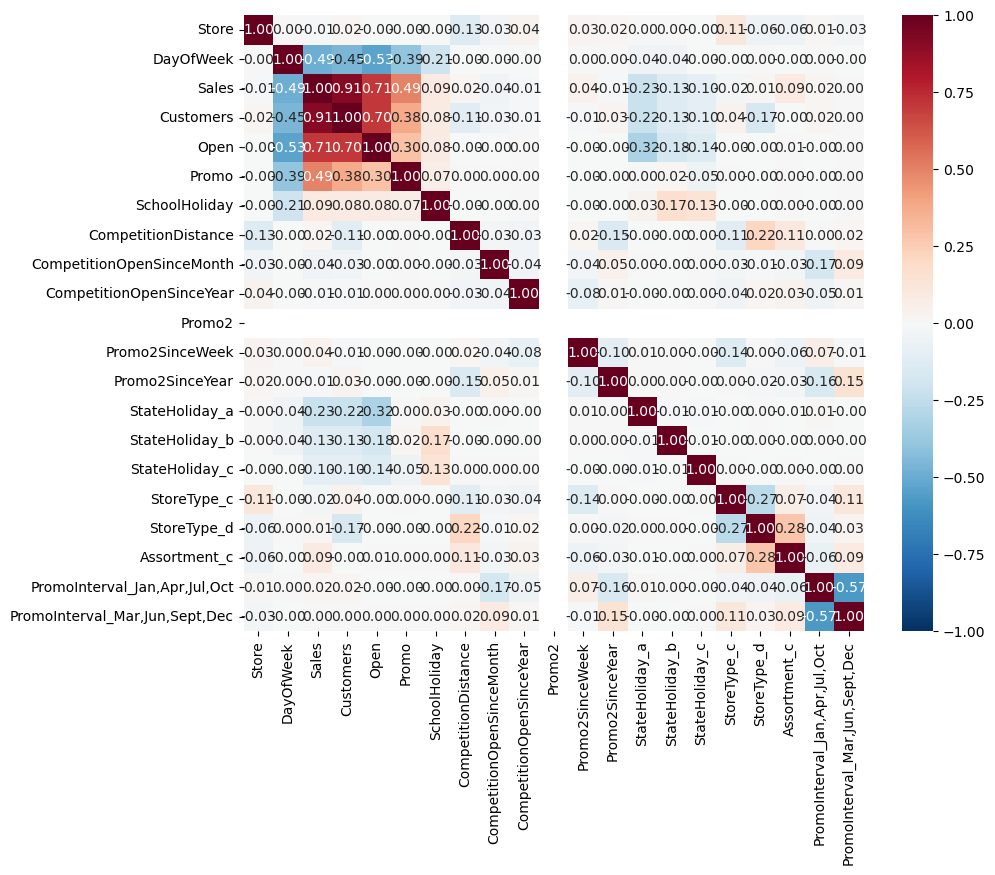

In [66]:
plt.figure(figsize=(10, 8))
sns.heatmap(df1.corr(),
            cmap='RdBu_r', 
            vmin=-1, vmax=1,
            fmt = ".2f",
            annot=True);

As váriaveis não estão bem correlacionadas, provavelmente não teremos problemas com multicolinearidade

In [64]:
X = df1. drop(['Sales','Date'], axis=1)
y= df1['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erro Quadrático Médio (MSE): {mse}")
print(f"Coeficiente de Determinação (R^2): {r2}")

Erro Quadrático Médio (MSE): 1245418.282410489
Coeficiente de Determinação (R^2): 0.8982559430481134


In [69]:
X1 = df1. drop(['Sales','Date','Open','Customer'], axis=1)
y1= df1['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erro Quadrático Médio (MSE): {mse}")
print(f"Coeficiente de Determinação (R^2): {r2}")

KeyError: "['Customer'] not found in axis"